In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import collections
import matplotlib.pyplot as plt

In [2]:
taxi14 = pd.DataFrame()
for f in ['414', '514', '614']:
    path = f'taxi_data/{f}.feather'
    toadd = pd.read_feather(path)
    taxi14 = pd.concat([taxi14, toadd])
taxi14.reset_index(drop=True, inplace=True)

In [3]:
taxi14['ts'] = taxi14[' pickup_datetime'].fillna(taxi14['VendorID'])
taxi14['Lon'] = taxi14[' pickup_longitude'].fillna(taxi14['Pickup_longitude'])
taxi14['Lat'] = taxi14[' pickup_latitude'].fillna(taxi14['Pickup_latitude'])


In [4]:
zones = gpd.read_file('shape_files/taxi_zones.shp')

In [5]:
gdf14 = gpd.GeoDataFrame(taxi14, geometry=gpd.points_from_xy(taxi14.Lon, taxi14.Lat))
gdf14.set_crs(epsg=4326, inplace=True)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,ts,Lon,Lat,geometry
0,2014-04-19 14:39:27,N,1.0,-73.947319,40.784286,-73.983124,40.726589,1.0,6.25,20.5,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-19 14:39:27,-73.983124,40.726589,POINT (-73.98312 40.72659)
1,2014-04-04 15:14:05,N,1.0,-73.954170,40.587368,-73.841049,40.663254,1.0,9.40,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-04 15:14:05,-73.841049,40.663254,POINT (-73.84105 40.66325)
2,2014-04-02 19:44:16,N,1.0,-73.882103,40.856987,-73.945007,40.820026,1.0,1.00,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-02 19:44:16,-73.945007,40.820026,POINT (-73.94501 40.82003)
3,2014-04-19 15:40:49,N,1.0,-73.982933,40.677372,-73.977043,40.681610,1.0,0.54,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-19 15:40:49,-73.977043,40.681610,POINT (-73.97704 40.68161)
4,2014-04-25 19:30:06,N,1.0,-73.954865,40.789261,-73.982986,40.761898,1.0,2.79,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-25 19:30:06,-73.982986,40.761898,POINT (-73.98299 40.76190)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363707,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,0.5,0.5,0.00,0.0,30.00,2014-06-21 03:08:46,-74.000561,40.720161,POINT (-74.00056 40.72016)
2363708,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,1.0,0.5,1.00,0.0,10.50,2014-06-23 19:58:00,-73.975190,40.755622,POINT (-73.97519 40.75562)
2363709,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.5,0.5,0.5,0.00,0.0,17.50,2014-06-26 21:12:02,-73.987630,40.760115,POINT (-73.98763 40.76011)
2363710,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,1.0,0.5,1.25,0.0,7.25,2014-06-19 17:03:40,-73.983757,40.749638,POINT (-73.98376 40.74964)


In [6]:
joined = zones.to_crs(epsg=4326).sjoin(gdf14)

/home/amit/anaconda3/envs/uber/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


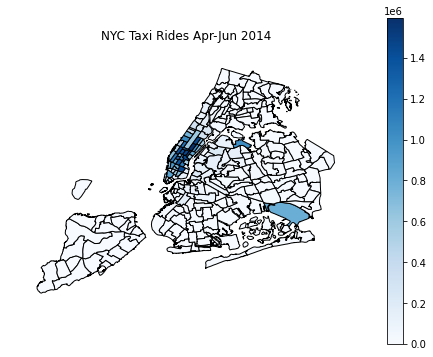

In [7]:
cnt=collections.Counter(joined['zone'])
zones['freq14'] = zones['zone'].map(cnt) * 20
gplt.choropleth(zones, hue='freq14', cmap='Blues', legend=True)
plt.title('NYC Taxi Rides Apr-Jun 2014')
plt.savefig('graphs/2014_taxi_map', dpi=600)

In [8]:
taxi15 = pd.DataFrame()
for f in ['415', '515', '615']:
    path = f'taxi_data/{f}.feather'
    toadd = pd.read_feather(path)
    taxi15 = pd.concat([taxi15, toadd])
taxi15.reset_index(drop=True, inplace=True)

In [9]:
taxi15['ts'] = taxi15['lpep_pickup_datetime'].fillna(taxi15['tpep_pickup_datetime'])
taxi15['Lon'] = taxi15['pickup_longitude'].fillna(taxi15['Pickup_longitude'])
taxi15['Lat'] = taxi15['pickup_latitude'].fillna(taxi15['Pickup_latitude'])

In [10]:
gdf15 = gpd.GeoDataFrame(taxi15, geometry=gpd.points_from_xy(taxi15.Lon, taxi15.Lat))
gdf15.set_crs(epsg=4326, inplace=True)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,ts,Lon,Lat,geometry
0,2015-04-17 22:17:27,N,1.0,-73.988686,40.702503,-73.964310,40.719002,6.0,3.81,14.5,...,NaN,NaN,NaN,NaN,NaN,NaN,N,-73.964310,40.719002,POINT (-73.96431 40.71900)
1,2015-04-18 01:03:58,N,1.0,-73.912697,40.774643,-73.897224,40.768173,1.0,1.20,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,-73.897224,40.768173,POINT (-73.89722 40.76817)
2,2015-04-07 19:27:00,N,1.0,-73.987335,40.691566,-74.015350,40.675350,1.0,2.31,9.5,...,NaN,NaN,NaN,NaN,NaN,NaN,N,-74.015350,40.675350,POINT (-74.01535 40.67535)
3,2015-04-26 18:17:12,N,1.0,-73.871796,40.878620,-73.872185,40.878670,1.0,5.63,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,-73.872185,40.878670,POINT (-73.87218 40.87867)
4,2015-04-24 21:04:03,N,1.0,-73.940697,40.814487,-73.976868,40.789845,1.0,3.33,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,-73.976868,40.789845,POINT (-73.97687 40.78984)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182249,2,None,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,13.0,0.0,0.5,0.00,0.0,13.80,2015-06-27 12:54:05,-73.972351,40.747437,POINT (-73.97235 40.74744)
2182250,1,None,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,14.5,0.0,0.5,4.55,0.0,19.85,2015-06-07 16:24:27,-73.962181,40.779228,POINT (-73.96218 40.77923)
2182251,2,None,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,6.5,0.0,0.5,1.46,0.0,8.76,2015-06-13 16:26:15,-73.983238,40.737991,POINT (-73.98324 40.73799)
2182252,1,None,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,10.0,1.0,0.5,0.00,0.0,11.80,2015-06-29 18:19:26,-74.000008,40.727036,POINT (-74.00001 40.72704)


In [11]:
joined = zones.to_crs(epsg=4326).sjoin(gdf15)

/home/amit/anaconda3/envs/uber/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


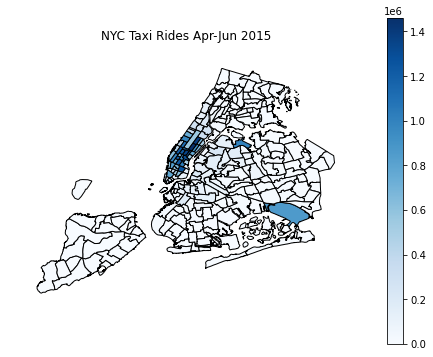

In [12]:
cnt=collections.Counter(joined['zone'])
zones['freq15'] = zones['zone'].map(cnt) * 20
gplt.choropleth(zones, hue='freq15', cmap='Blues', legend=True)
plt.title('NYC Taxi Rides Apr-Jun 2015')
plt.savefig('graphs/2015_taxi_map', dpi=600)

In [13]:
zones['diff'] = zones['freq15'] - zones['freq14']
zones

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,freq14,freq15,diff
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",5140,4760,-380
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",0,40,40
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3520,3260,-260
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",157960,132060,-25900
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",0,60,60
...,...,...,...,...,...,...,...,...,...,...
258,Brooklyn,256.0,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712...",164600,146980,-17620
259,Bronx,259.0,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909...",2960,2980,20
260,Queens,260.0,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759...",79800,91980,12180
261,Manhattan,261.0,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",205420,197720,-7700


/home/amit/anaconda3/envs/uber/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


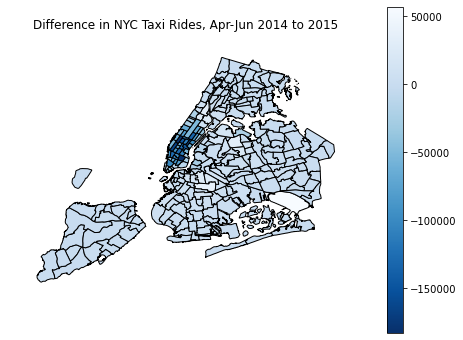

In [14]:
gplt.choropleth(zones, hue='diff', cmap='Blues_r', legend=True)
plt.title('Difference in NYC Taxi Rides, Apr-Jun 2014 to 2015')
plt.savefig('graphs/taxi_diff_map', dpi=600)

<AxesSubplot:>

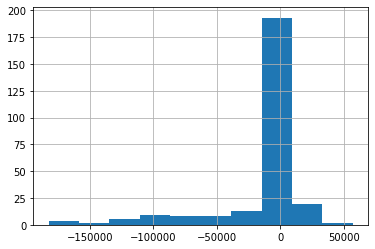

In [15]:
zones['diff'].hist()

In [16]:
zones.to_feather('taxi_zones.feather')

/tmp/ipykernel_139879/2392186546.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  zones.to_feather('taxi_diff.feather')
